# **Employees Retention: Providing data-driven suggestions for HR**

# **PACE stages**


## **Pace: Plan**

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and ask to provide data-driven suggestions based on of the data. They have the following question: 

**what’s likely to make the employee leave the company?**

Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns={
    'average_montly_hours': 'average_monthly_hours',  # Correcting misspelling
    'time_spend_company': 'tenure',  # Making it more concise
    'Work_accident': 'work_accident',  # Standardizing to snake_case
    'Department': "department",
}, inplace=True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df0.duplicated().sum()

3008

3008 duplicated entries (~20% of the dataset)

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates().reset_index(drop=True)


# Display first few rows of new dataframe as needed
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

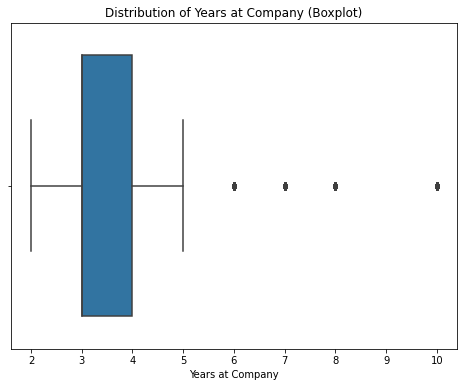

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'])
plt.title('Distribution of Years at Company (Boxplot)')
plt.xlabel('Years at Company')
plt.show()



In [12]:
# Determine the number of rows containing outliers
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


n_out = df[
    (df['tenure'] < lower_bound) |
    (df['tenure'] > upper_bound)
].shape[0]

print(f"Out of the total data ({len(df):,.0f} entries), {n_out:,.0f} values fall beyond the range of [{lower_bound}-{upper_bound}] years and are considered as outliers.")

Out of the total data (11,991 entries), 824 values fall beyond the range of [1.5-5.5] years and are considered as outliers.


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

💭
### Reflect on these questions to complete the plan stage.

**Who are your stakeholders for this project?**
- The primary stakeholders for this project are the HR department at Salifort Motors, who initiated the data analysis project to improve employee satisfaction levels.
- The senior leadership team at Salifort Motors is also a key stakeholder, as they are concerned about the high turnover rate and seek data-driven suggestions to address the issue.

**What are you trying to solve or accomplish?**
- The main objective is to analyze the HR dataset and build a predictive model to identify factors influencing employee turnover.
- Provide data-driven suggestions to the HR department for improving employee satisfaction and retention.

**What are your initial observations when you explore the data?**
- The dataset contains 15,000 rows and 10 columns, including variables such as satisfaction level, last evaluation score, number of projects, average monthly hours, time spent with the company, work accidents, promotions, department, and salary.
- Key focus will be on the 'left' column, indicating whether an employee left the company.
- Variables like satisfaction level, last evaluation score, and number of projects seem particularly relevant for predicting turnover.

**What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**
- Jupyter Notebook or any preferred data analysis tool for exploring and analyzing the dataset.

**Do you have any ethical considerations in this stage?**
- Ensure the privacy and confidentiality of employee data during analysis.
- Avoid any biased or discriminatory practices in model development and interpretation.
- Clearly communicate the purpose and implications of the analysis to stakeholders, emphasizing its use for improving the work environment and employee satisfaction.

Will proceed with the analysis, keeping these considerations in mind.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
left_count = df['left'].sum()  # '1' represents leaving
stayed_count = df['left'].count() - left_count

# Get percentages of people who left vs. stayed
left_percentage = (left_count / df['left'].count())
stayed_percentage = 1 - left_percentage

# Display the results
print(f"Number of employees who left: {left_count:,.0f}")
print(f"Number of employees who stayed: {stayed_count:,.0f}")
print(f"Percentage of employees who left: {left_percentage:.2%}")
print(f"Percentage of employees who stayed: {stayed_percentage:.2%}")



Number of employees who left: 1,991
Number of employees who stayed: 10,000
Percentage of employees who left: 16.60%
Percentage of employees who stayed: 83.40%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

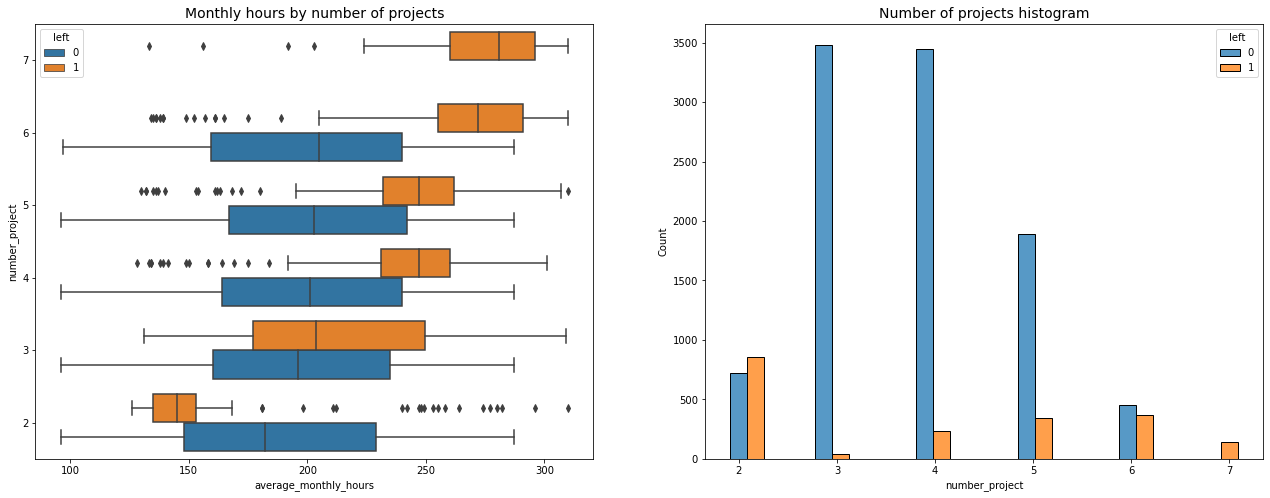

In [14]:
# Create a plot as needed
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()


The plot shows a positive correlation between the number of projects and the average monthly hours of the employees. However, there are some outliers among the employees who left the company. They can be divided into two groups: (A) those who worked significantly less than the average for their project number, and (B) those who worked excessively more. Group A might include employees who were terminated or who had reduced workload before leaving. Group B might include employees who were overburdened and dissatisfied with their work. 

All the employees who had seven projects left the company, and they worked around 255–295 hours per month, which is much higher than any other group.

The best number of projects for employee retention seems to be 3–4, as the proportion of employees who left in these groups is very low.

Assuming a standard work week of 40 hours and two weeks of vacation per year, the average monthly hours for a regular employee would be 166.67 hours. This means that most of the employees in this company, except those with two projects, worked more than this amount. This suggests that the company has a problem with overworking its employees.

A possible next step is to verify that all the employees with seven projects left the company.

In [15]:
# Get value counts of stayed/left for employees with 7 projects
df[df['number_project']==7]['left'].value_counts()


1    145
Name: left, dtype: int64

**All employees with 7 projects did leave the company.**

Next, let's examine the average monthly hours versus the satisfaction levels.

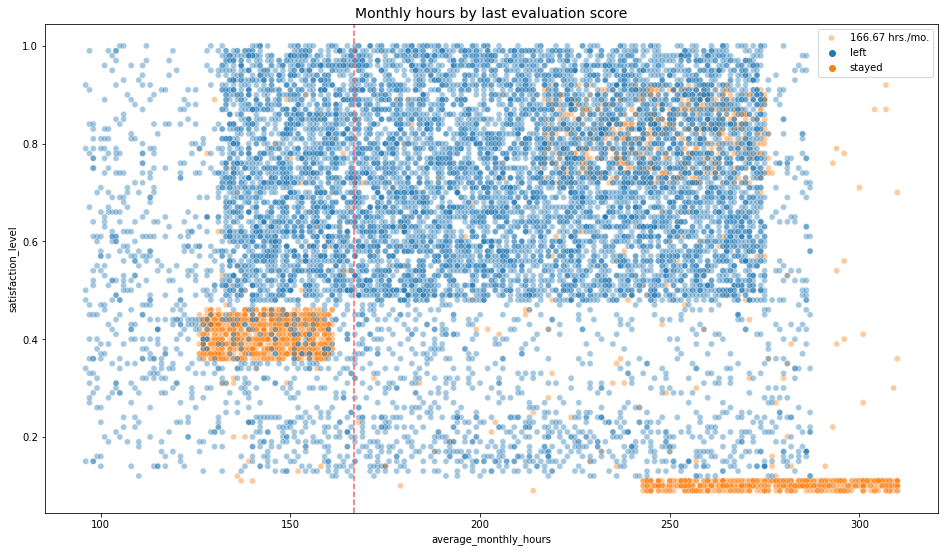

In [16]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The above scatterplot reveals a significant cluster of employees who worked around 240 to 315 hours per month. That means they worked more than 75 hours per week for a whole year. This might explain why their satisfaction levels were almost zero.

The plot also shows another cluster of employees who quit, those who had more reasonable working hours. However, their satisfaction was only about 0.4. It is hard to guess what made them quit. Maybe they felt stressed to work harder, since many of their colleagues worked longer. And that stress could have reduced their satisfaction levels.

Lastly, there is a cluster who worked between 210 and 280 hours per month, and they had satisfaction levels between 0.7 and 0.9.

Notice the odd shape of the distributions here. This suggests that the data was manipulated or generated artificially.

For the next visualization, it could be interesting to plot satisfaction levels by tenure.

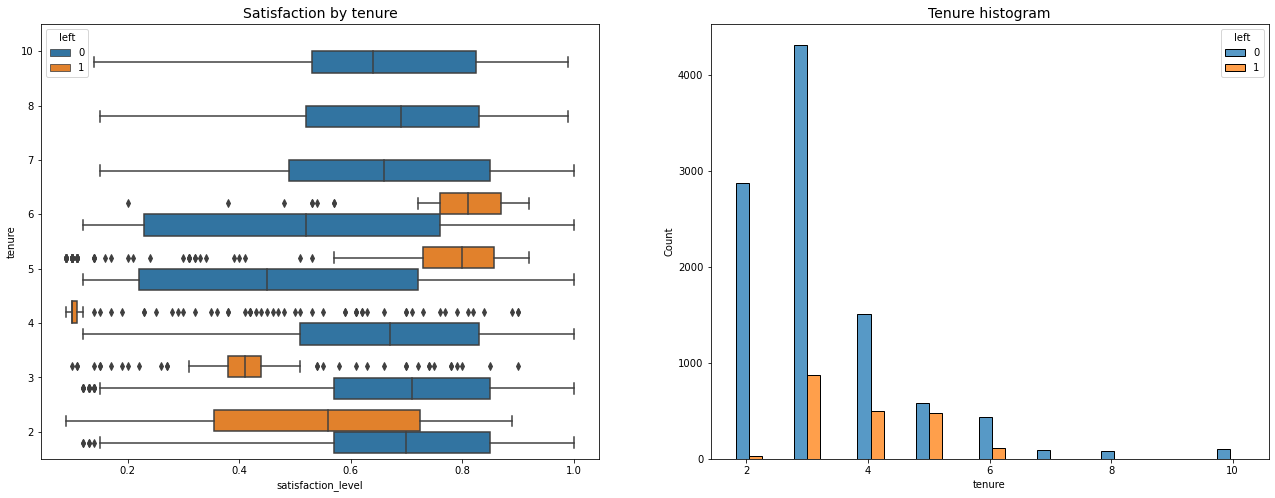

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();


These plots reveals some interesting patterns about the employees who left and those who stayed. We can see that there are two main groups of employees who left: those who were unhappy with their jobs and had short tenures, and those who were very happy with their jobs and had medium tenures. Perhaps the latter group left for better opportunities elsewhere. A curious finding is that the employees who left after four years had a very low satisfaction score. This could indicate some negative changes in the company culture or policies that affected this cohort. On the other hand, the employees who stayed for the longest time did not leave, and they had similar satisfaction scores to the newer employees who stayed. This could suggest that they are loyal, satisfied, and well-compensated employees. The histogram also shows that there are fewer employees with longer tenures, which could imply that they are senior or managerial positions.

A possible next step in analyzing the data is to compute the average and median satisfaction scores of the employees who left and those who stayed. This could help us quantify the differences between the two groups and test for statistical significance.

In [18]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The data shows that employees who quit the company had lower satisfaction scores on average than those who stayed. Also, the mean satisfaction score of employees who stayed is slightly lower than the median score. This suggests that the distribution of satisfaction scores among employees who stayed is left-skewed.

A possible next step is to analyze how salary levels vary by tenure.

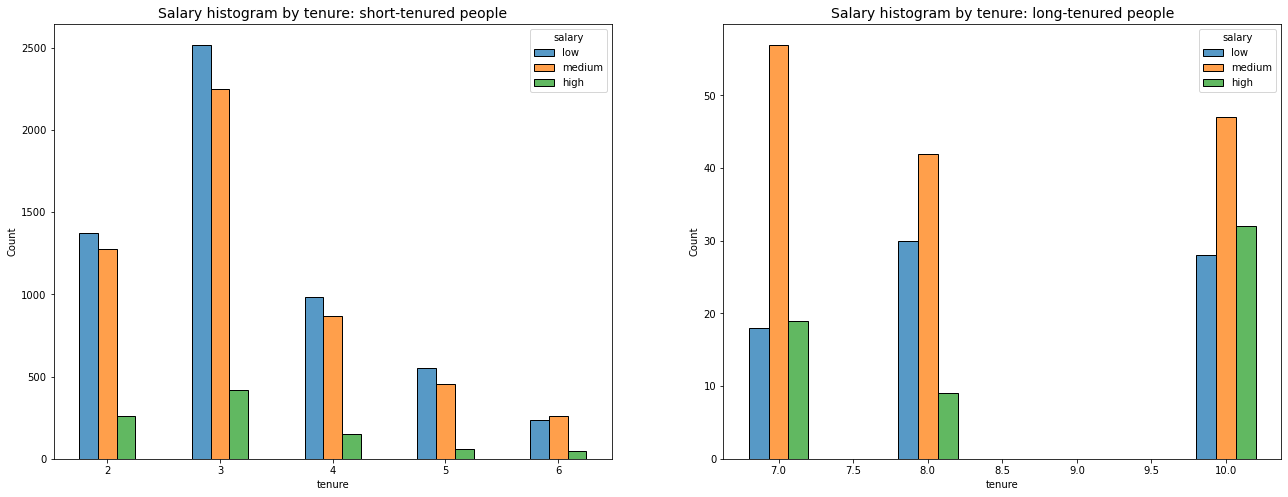

In [19]:
# Create a plot as needed
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

From the plots, we can see that there is no clear relationship between the length of employment and the salary level. Employees who stayed longer in the company did not necessarily earn more than those who left earlier.

Another question that might be interesting to investigate is whether working more hours leads to better performance evaluations. We can visualize this by plotting the average monthly hours against the last evaluation score for each employee.

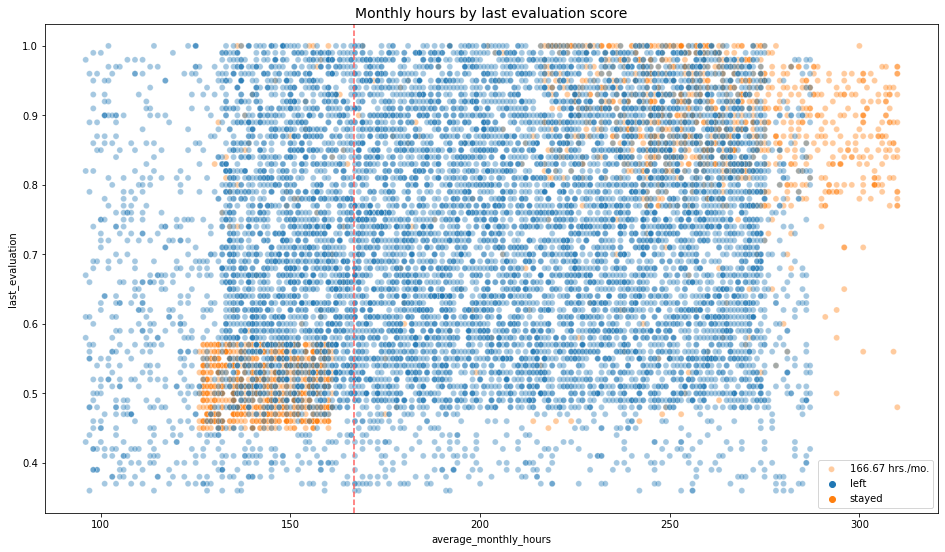

In [20]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows some interesting patterns about the employees who left the company:

We can see two clusters of employees who quit: one group of high performers who worked too much and one group of low performers who worked slightly less than the average monthly hours of 166.67.
There seems to be a relationship between hours worked and evaluation score.
There are not many employees in the top left corner of this plot; but working long hours does not always mean getting a good evaluation score.
Most of the employees in this company worked more than 167 hours per month.
A possible next step is to check if the employees who worked very long hours got promoted in the last five years.

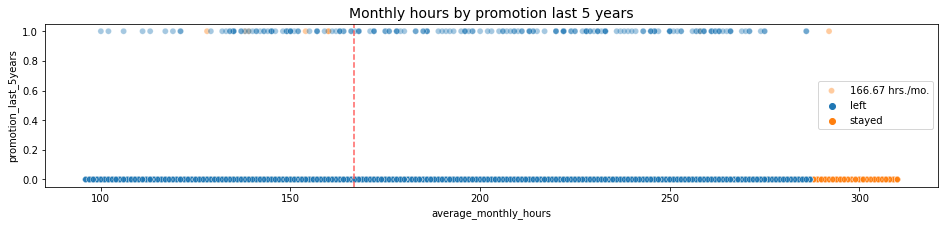

In [21]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


From the plot, we can observe some interesting patterns:
- Promotion seems to have a positive effect on retention, as only a small fraction of the promoted employees left the company in the last five years.
- Promotion also seems to be related to workload, as the employees who worked the most hours had the lowest promotion rate.
- Workload seems to have a negative effect on retention, as all of the employees who left had the highest number of hours worked.

A possible next step is to explore how the employees who left are distributed across different departments.

In [22]:
# Display counts for each department
df["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

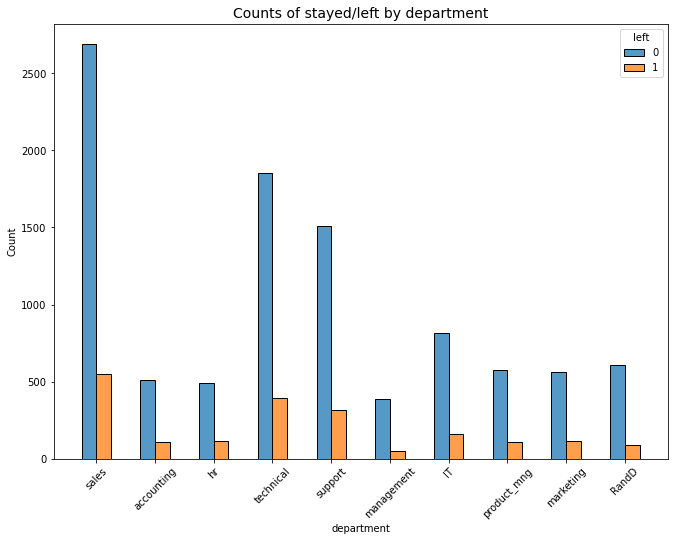

In [23]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

To conclude, the data does not show any significant difference in the attrition rate among different departments. This suggests that the factors that influence employee retention are not related to the specific functions or roles of each department. However, a further analysis could be done to explore the correlations between other variables in the data, such as salary, satisfaction, performance, or tenure.

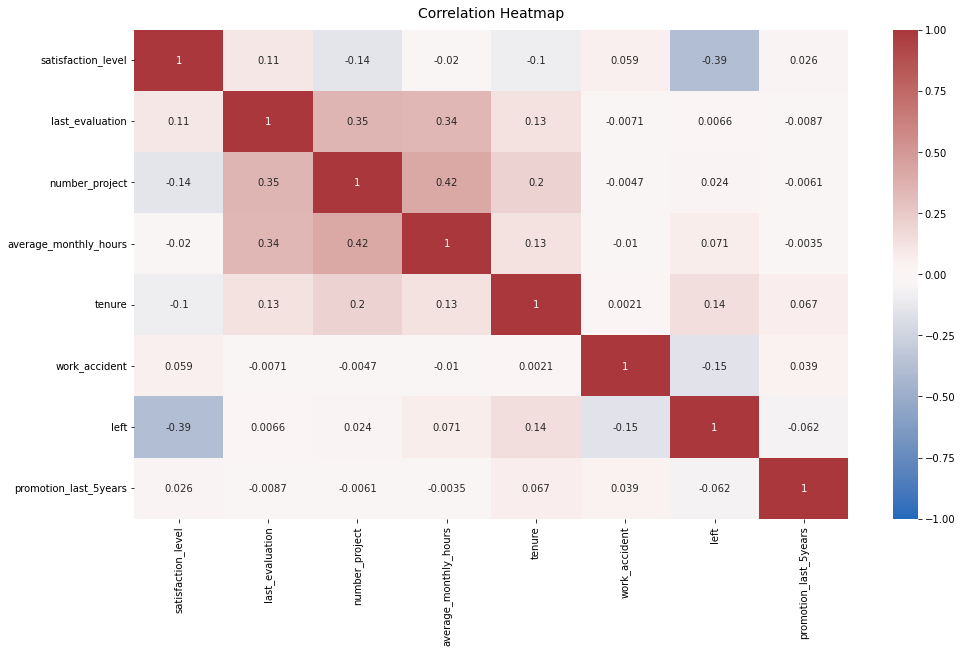

In [24]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The heatmap of correlation shows that there is a positive relationship between the number of projects, monthly hours, and evaluation scores. These variables are all linked to each other. On the other hand, the employee's satisfaction level has a negative relationship with whether they leave the company. The lower the satisfaction, the higher the chance of leaving.

### Insights

Poor management seems to be the main reason why employees are quitting the company. They have to deal with long working hours, multiple projects, and low satisfaction levels. This can make them feel unappreciated and frustrated. Many employees in this company may be suffering from burnout. Moreover, employees who have stayed for more than six years are less likely to quit.

💭
### Reflect on these questions as you complete the analyze stage.

**What did you observe about the relationships between variables?**
- Satisfaction level is positively correlated with promotion and negatively correlated with the number of projects and average monthly hours.
- Higher average monthly hours are associated with employees leaving.
- Work accident status and promotion in the last 5 years seem to have an impact on employee retention.
- Salary levels correlate with leaving status, with lower salaries associated with higher leaving proportions.

**What do you observe about the distributions in the data?**
- Satisfaction levels are skewed, with a peak around 0.8.
- Monthly hours and last evaluation scores have approximately normal distributions.
- Proportions of leaving status vary across departments and salary levels.

**What transformations did you make with your data? Why did you choose to make those decisions?**
- Dropped duplicate entries to ensure each employee is represented only once.
- Renamed columns to adhere to snake_case for consistency and ease of use.
- Utilized data visualization techniques to explore relationships and patterns in the data.

**What are some purposes of EDA before constructing a predictive model?**
- Understand the distribution and characteristics of individual variables.
- Identify patterns, trends, and relationships between variables.
- Detect outliers or anomalies that may impact model performance.
- Inform feature engineering and selection.
- Validate assumptions and check data quality.
- Guide the selection of appropriate modeling techniques.

**What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**
- **Seaborn Documentation:** [Seaborn Documentation](https://seaborn.pydata.org/)
- **Matplotlib Documentation:** [Matplotlib Documentation](https://matplotlib.org/)
- **Pandas Documentation:** [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

**Do you have any ethical considerations in this stage?**
- Ensure fair treatment of employees: While analyzing data related to employee turnover, it's essential to ensure that any insights gained are used ethically and do not contribute to unfair treatment of employees.
- Data privacy: It's crucial to handle employee data with care, adhering to data privacy regulations and guidelines to protect individuals' confidentiality.
- Avoid bias: Be cautious about potential biases in the data or analysis methods that could lead to unfair conclusions or decisions regarding employees.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task in this scenario is to predict whether an employee will leave the company (binary classification). The target variable is the "left" column, which indicates whether an employee has left the company (1) or stayed (0).

### Identify the types of models most appropriate for this task.

Given that the prediction task involves binary classification, several types of models can be considered. Here are some suitable model types:

1. Logistic Regression:

Logistic regression is a common choice for binary classification tasks.
It models the probability of the event (employee leaving) as a logistic function of the input features.

2. Random Forest:

Random Forest is an ensemble learning method that can handle classification tasks effectively.
It combines multiple decision trees to improve predictive accuracy and control overfitting.

3. Gradient Boosting (e.g., XGBoost):

Gradient Boosting algorithms, such as XGBoost, are powerful for binary classification tasks.
They build trees sequentially, with each tree correcting the errors of the previous ones.

### Modeling Approach A: Logistic Regression Model

Logistic regression is a suitable method for binary classification problems, such as predicting whether an employee will leave the company or not.

Before applying logistic regression, we need to transform the non-numeric variables in the data set. There are two such variables: department and salary.

department is a nominal variable, which means it has no inherent order among its categories. Therefore, we can use one-hot encoding to create dummy variables for each department.

salary is an ordinal variable, which means it has a natural order among its categories. For example, low < medium < high. Therefore, we can use label encoding to assign numeric values to each salary level, such as 0 for low, 1 for medium and 2 for high.


### Model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

In [25]:
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# VIF dataframe to check multicollinearity
vif_data = pd.DataFrame() 
vif_data["feature"] = df_enc.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_enc.values, i) 
                          for i in range(len(df_enc.columns))] 

vif_data

,feature,VIF
0,satisfaction_level,1.198235
1,last_evaluation,1.147357
2,number_project,1.231666
3,average_monthly_hours,1.174644
4,tenure,1.097372
5,work_accident,1.017985
6,left,1.208803
7,promotion_last_5years,1.026192
8,salary,1.036213
9,department_IT,4.467546


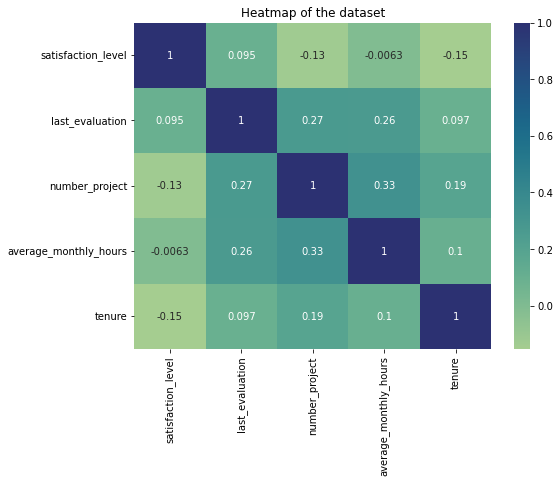

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

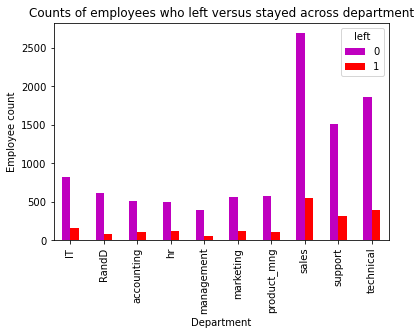

In [28]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df['department'], df['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [29]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_bound) & (df_enc['tenure'] <= upper_bound)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [31]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Logistic Regression Model:
AUC: 0.8825996555039329
Precision: 0.4404332129963899
Recall: 0.25902335456475584
Accuracy: 0.8194842406876791
F1-score: 0.32620320855614976

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792

CPU times: user 9.79 s, sys: 935 ms, total: 10.7 s
Wall time: 1.57 s


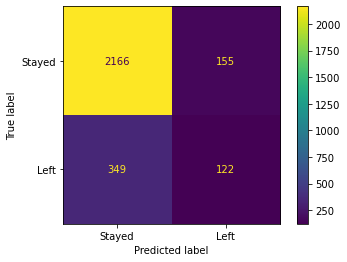

In [33]:
%%time
# Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=500)
logreg_model.fit(X_train, y_train)

# Predictions
logreg_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:")
print("AUC:", roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1]))
print("Precision:", precision_score(y_test, logreg_pred))
print("Recall:", recall_score(y_test, logreg_pred))
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("F1-score:", f1_score(y_test, logreg_pred))
print("\nClassification Report:\n", classification_report(y_test, logreg_pred))


# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, logreg_pred, labels=logreg_model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=["Stayed", "Left"])
disp.plot(values_format='');



In [34]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too much.

In [35]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, logreg_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



According to the classification report above, the logistic regression model performed well in predicting the overall employee retention, with a weighted average precision of 79%, recall of 82%, f1-score of 80%, and accuracy of 82%. However, the model struggled to identify the employees who left the company, as indicated by the lower scores for that class. This suggests that the model is biased towards the majority class and needs to be improved to capture the minority class better.

**Do you notice anything odd?**
   -  VIF values for the Logistic Regression model, show that 'last_evaluation', 'number_project', 'average_monthly_hours', 'satisfaction_level' and 'years_at_company' have relatively high VIF values. This suggests a potential issue of multicollinearity among these variables.


1. **Are each of the assumptions met?**
   
   For logistic regression:
   - [X] Outcome variable is categorical
   - [X] Observations are independent of each other
   - [ ] No severe multicollinearity among X variables
   - [ ] No extreme outliers
   - [X] Linear relationship between each X variable and the logit of the outcome variable
   - [X] Sufficiently large sample size
   
   **Severe multicollinearity among X variables**
   
   **Extreme outliers**

### Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree, Random Forest and XGBoost.


In [36]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                        })
  
    return table

In [37]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                         })
  
    return table

In [38]:
def write_pickle(model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [39]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [40]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [42]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='f1')

In [43]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.97 s, sys: 38.9 ms, total: 3.01 s
Wall time: 2.82 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [44]:
tree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [45]:
tree1.best_score_

0.9430649798741478

In [46]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'f1')
tree1_cv_results

,model,precision,recall,F1,accuracy
0,decision tree cv,0.978396,0.910256,0.943065,0.981764


In [47]:
tree1_test_scores = get_scores('tree1 test', tree1, X_test, y_test)
tree1_test_scores

,model,precision,recall,F1,accuracy
0,tree1 test,0.965812,0.907631,0.935818,0.97932


All of these scores from the decision tree model are strong indicators of good model performance.

**Random Forest**

In [48]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [49]:
%%time
rf1.fit(X_train, y_train) # wall time 22min 23sec

CPU times: user 22min 2s, sys: 3.18 s, total: 22min 5s
Wall time: 22min 7s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [50]:
write_pickle(rf1, 'hr_rf1')

In [51]:
rf1.best_score_

0.9485722271171991

In [52]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [53]:
# Get all CV scores
rf1_cv_results = make_results('random forest1 cv', rf1, 'f1')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy
0  decision tree cv   0.978396  0.910256  0.943065  0.981764
               model  precision    recall        F1  accuracy
0  random forest1 cv   0.984833  0.914949  0.948572  0.983543


The random forest model has higher evaluation scores than the decision tree model in most metrics, except for recall (the difference is only 0.001, which is very small). This shows that the random forest model is generally better than the decision tree model.

The next step is to test the final model on the test set.

In [54]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
print(tree1_test_scores)
print(rf1_test_scores)

        model  precision    recall        F1  accuracy
0  tree1 test   0.965812  0.907631  0.935818   0.97932
                 model  precision    recall        F1  accuracy
0  random forest1 test   0.991361  0.921687  0.955255  0.985657


The model shows consistent results across the validation and test sets, which is desirable. This indicates that the model has a high level of reliability. Since the test set was not used for any other model, you can trust that your model's performance on this data reflects how it will perform on new, unseen data.

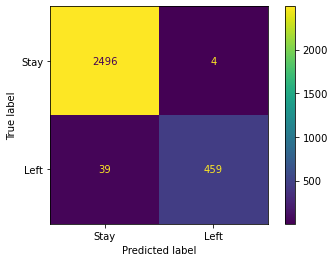

In [55]:
# Generate array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Stayed','Left'])
disp.plot(values_format='');

The model has a higher rate of false positives than false negatives, which implies that some employees may be wrongly classified as likely to quit or be terminated, when they are actually not. However, this is still a robust model.

**XGBoost Model**

In [56]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [57]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 19.6 s, total: 1min 32s
Wall time: 13.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [58]:
# Write pickle
write_pickle(xgb1, 'hr_xgb1')

In [59]:
# Examine best score
xgb1.best_score_

0.9407401493084986

In [60]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [61]:
xgb1_cv_results = make_results('xgboost cv1', xgb1, 'f1')
xgb1_cv_results

,model,precision,recall,F1,accuracy
0,xgboost cv1,0.974196,0.909584,0.94074,0.980985


In [62]:
xgb1_test_scores = get_scores('xgboost test1', xgb1, X_test, y_test)

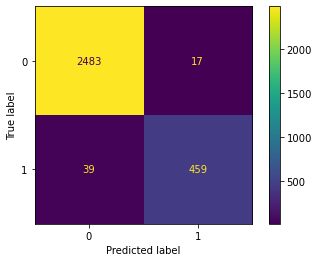

In [63]:
# Generate array of values for confusion matrix
preds = xgb1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Stayed','Left'])
disp.plot(values_format='');

The model has a higher rate of false positives than false negatives, which implies that some employees may be wrongly classified as likely to quit or be terminated, when they are actually not. However, this is still a robust model.

In [64]:
result1 = tree1_cv_results
result1 = pd.concat([tree1_cv_results, tree1_test_scores, rf1_cv_results, rf1_test_scores, xgb1_cv_results, xgb1_test_scores], axis=0)
result1

,model,precision,recall,F1,accuracy
0,decision tree cv,0.978396,0.910256,0.943065,0.981764
0,tree1 test,0.965812,0.907631,0.935818,0.979320
0,random forest1 cv,0.984833,0.914949,0.948572,0.983543
0,random forest1 test,0.991361,0.921687,0.955255,0.985657
0,xgboost cv1,0.974196,0.909584,0.940740,0.980985
0,xgboost test1,0.964286,0.921687,0.942505,0.981321


### **Feature Engineering**
You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature overworked. It will be a binary variable.

In [65]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

- Henc, define being overworked as working more than 175 hours per month on average.

- To make the overworked column binary, the column using a boolean mask.

- df2['overworked'] > 175 creates a series of booleans, consisting of True for every value > 175 and False for every values ≤ 175
- .astype(int) converts all True to 1 and all False to 0

In [67]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [68]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [69]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [70]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

**Descision Tree w/ FE**


In [71]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='f1')

In [72]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.31 s, sys: 39 ms, total: 2.35 s
Wall time: 2.11 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [73]:
# Check best params
tree2.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [74]:
# Check best AUC score on CV
tree2.best_score_

0.891145651195781

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [75]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'f1')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy
0  decision tree cv   0.978396  0.910256  0.943065  0.981764
               model  precision    recall        F1  accuracy
0  decision tree2 cv   0.890937  0.891493  0.891146  0.963861


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

In [76]:
tree2_test_scores = get_scores('tree2 test', tree2, X_test, y_test)
tree2_test_scores

,model,precision,recall,F1,accuracy
0,tree2 test,0.867562,0.907631,0.887144,0.961641


**Random Forest w/ FE**

In [77]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [78]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 15min 14s

CPU times: user 15min 17s, sys: 6.17 s, total: 15min 23s
Wall time: 15min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [79]:
# Write pickle
write_pickle(rf2, 'hr_rf2')

In [80]:
# Check best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [81]:
# Check best AUC score on CV
rf2.best_score_

0.8986028126164461

In [82]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'f1')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy
0  decision tree2 cv   0.890937  0.891493  0.891146  0.963861
               model  precision    recall        F1  accuracy
0  random forest2 cv   0.910057  0.887475  0.898603  0.966752


As we can see, the random forest has a slight edge over the decision tree in terms of AUC, even though both models have lower scores than before. This means that the random forest is more robust and can generalize better to unseen data.

Now that we have chosen the best model, we need to evaluate it on the test set, which we have kept aside until now. This will give us an estimate of how well our model will perform on new data in the real world.

In [83]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,F1,accuracy
0,random forest2 test,0.900407,0.889558,0.894949,0.96531


This seems to be a stable, well-performing final model.

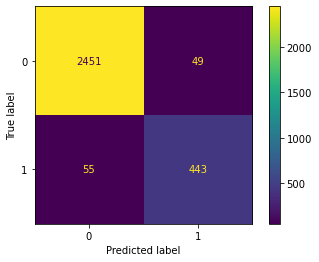

In [84]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Stayed','Left'])
disp.plot(values_format='');

The model has a higher rate of false positives than false negatives, which implies that some employees may be wrongly classified as likely to quit or be terminated, when they are actually not. However, this is still a robust model.

**XGBoost Model w/FE**

In [85]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb2 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [86]:
%%time
xgb2.fit(X_train, y_train)

CPU times: user 1min 9s, sys: 18.6 s, total: 1min 27s
Wall time: 12.8 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [87]:
# Write pickle
write_pickle(xgb2, 'hr_xbg2')

In [88]:
# Examine best score
xgb2.best_score_

0.8743181602009509

In [89]:
# Examine best parameters
xgb2.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [90]:
xgb2_cv_results = make_results('xgboost cv2', xgb2, 'f1')

In [91]:
xgb2_test_scores = get_scores('xgboost test2', xgb2, X_test, y_test)

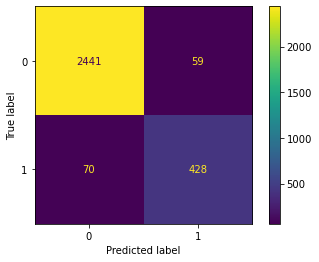

In [92]:
# Generate array of values for confusion matrix
preds = xgb2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Stayed','Left'])
disp.plot(values_format='');

The model has a higher rate of false positives than false negatives, which implies that some employees may be wrongly classified as likely to quit or be terminated, when they are actually not. However, this is still a robust model.

In [93]:
result2 = tree2_cv_results
result2 = pd.concat([tree2_cv_results, tree2_test_scores, rf2_cv_results, rf2_test_scores, xgb2_cv_results, xgb2_test_scores], axis=0)
result2

,model,precision,recall,F1,accuracy
0,decision tree2 cv,0.890937,0.891493,0.891146,0.963861
0,tree2 test,0.867562,0.907631,0.887144,0.961641
0,random forest2 cv,0.910057,0.887475,0.898603,0.966752
0,random forest2 test,0.900407,0.889558,0.894949,0.965310
0,xgboost cv2,0.889133,0.860024,0.874318,0.958969
0,xgboost test2,0.878850,0.859438,0.869036,0.956971


For further analysis, let's examine the branches of the decision tree model and the most influential features in the random forest model.

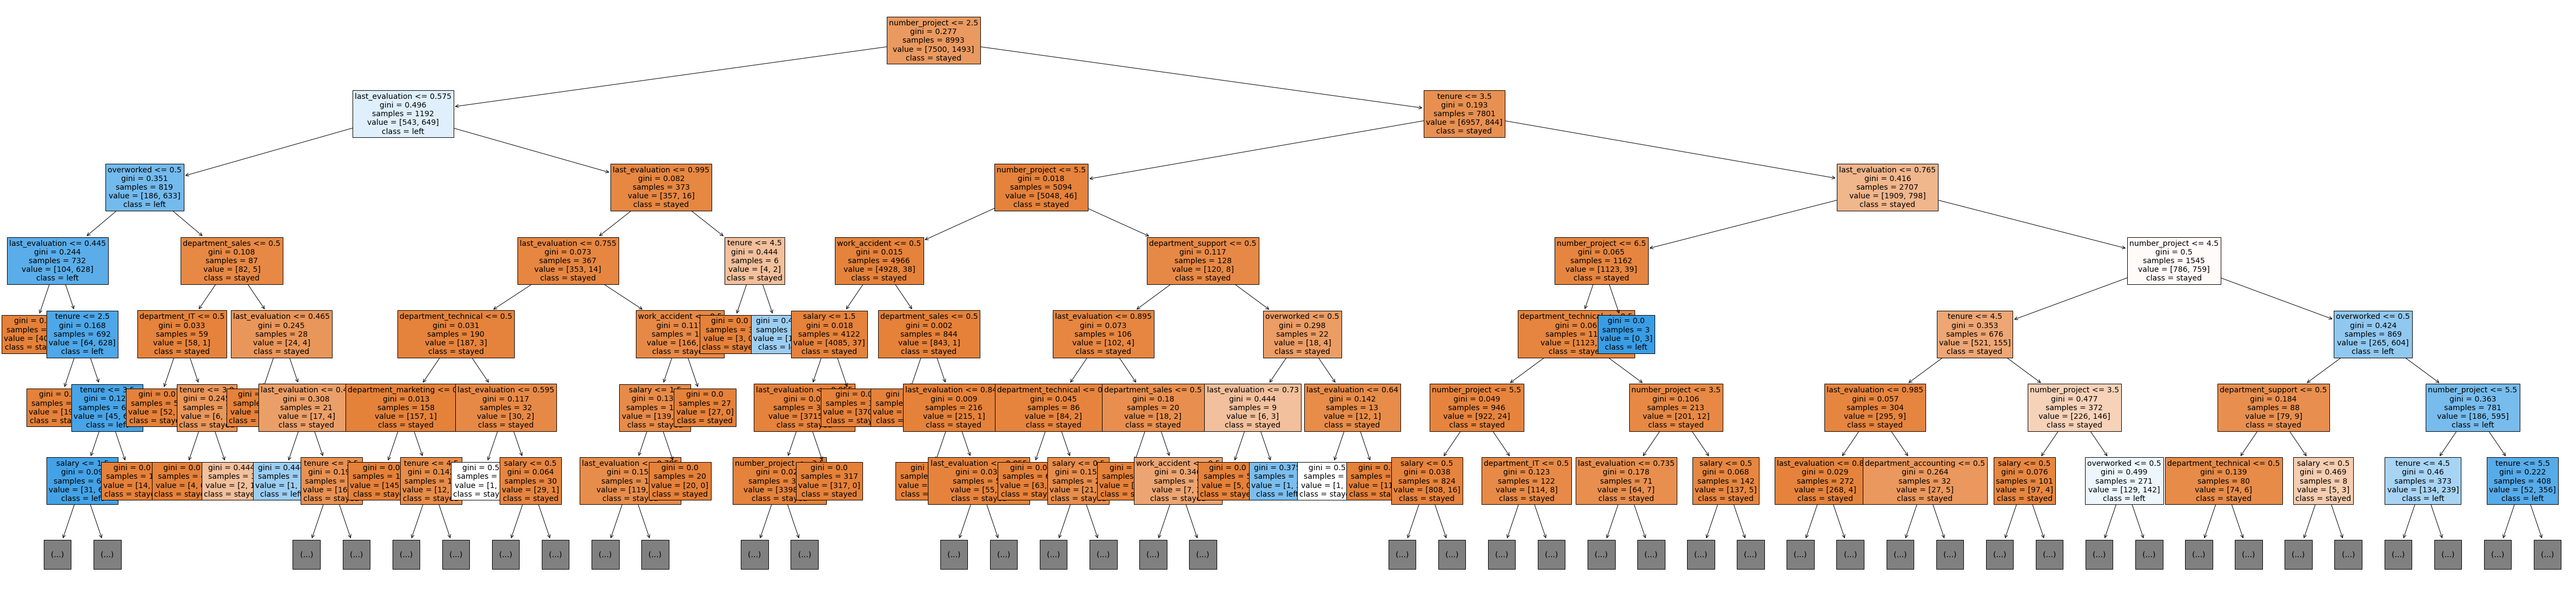

In [94]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [95]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.325505
number_project,0.313858
tenure,0.248636
overworked,0.101535
salary,0.003238
department_accounting,0.001872
department_support,0.001335
department_IT,0.001223
work_accident,0.001106
department_technical,0.001067


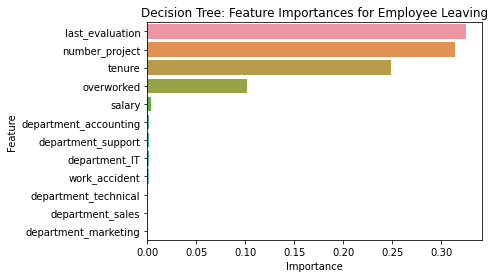

In [96]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

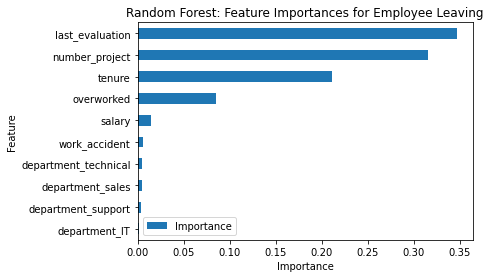

In [97]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The following paragraph summarizes the main findings from the random forest model, which predicts whether an employee left the company or not. The most important features for this prediction are `last_evaluation`, `number_project`, `tenure`, and `overworked`, as shown by the plot above. These features have the highest influence on the outcome variable, `left`, and they are consistent with the ones selected by the decision tree model.

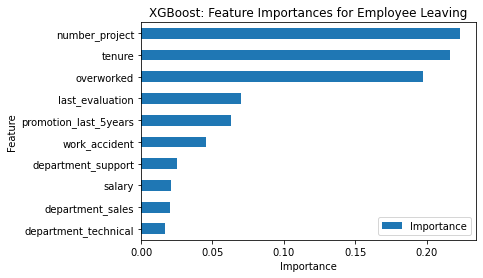

In [98]:
# Get feature importances
feat_impt = xgb2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(xgb2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("XGBoost: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The following paragraph summarizes the main findings from the XGBoost model, which predicts whether an employee left the company or not. The most important features for this prediction are `last_evaluation`, `number_project`, `tenure`, and `overworked`, as shown by the plot above. These features have the highest influence on the outcome variable, `left`, and they are consistent with the ones selected by the decision tree model.

The independent variables chosen for the model include features related to employee 
   - **satisfaction**
   - **performance evaluation**
   - **number of projects**
   - **average monthly hours worked**
   - **time spent with the company**
   - **work accidents**
   - **promotion status**
   - **department** and 
   - **salary level**
   
These features were selected based on their potential relevance to predicting employee turnover.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation

### Summary of model results

**Logistic Regression**

The test set results for the logistic regression model were as follows: precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%.

**Tree-based Machine Learning**

The decision tree model, after feature engineering, achieved the following metrics on the test set: AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%. The random forest model slightly improved on the decision tree performance.

#### Conclusion, Recommendations, Next Steps

According to the models and the feature importances, the employees at the company are facing too much workload. 

To prevent employees from quitting, the following suggestions could be proposed to the decision-makers:

* Limit the number of projects to 3-4 that employees can handle.
* Think about promoting employees who have been loyal to the company for at least four years, or investigate further why they are unhappy. 
* Either compensate employees for working extra hours, or don't expect them to do so. 
* If employees are unaware of the company's overtime pay policies, educate them about it. If the workload and time off expectations are unclear, clarify them. 
* Conduct discussions at the company level and within teams to understand and improve the company work culture, in general and in specific situations. 
* High evaluation scores should not be exclusive to employees who work more than 200 hours per month. Consider a fair scale for rewarding employees who perform better/work harder. 

**Next Steps**

There might still be some risk of data leakage. It might be wise to see how predictions change when `last_evaluation` is excluded from the data. It is possible that evaluations are not done very often, in which case it would be helpful to be able to predict employee retention without this feature. It is also possible that the evaluation score influences whether an employee stays or leaves, in which case it might be helpful to switch and try to predict performance score. The same could apply to satisfaction score. 

Building a K-means model on this data and analyzing the clusters might reveal additional useful insights.